In [ ]:
from generate_intervals import generate_uniform_intervals, generate_gaussian_intervals
from cutting_plane import solve_problem
from generate_intervals import *
import matplotlib.pyplot as plt
import seaborn as sns

## Swiss NSF Intervals

In [2]:
x, intervals, intervals90, half_intervals, half_intervals90 = load_swiss_nsf()
k = 106

In [3]:
p, v, info = solve_problem(intervals, k, verbose=True)

Pruned 312 intervals. Solving with n=41, k=17.
Using symmetry breaking. Number of decision vars: 9.
Added initial monotonicity constraints: 8 from 1 chains.
Iteration 0: Added 17 constraints, total cuts: 17, v_LB= 16.2000.
Iteration 2: Added 0 constraints, total cuts: 31, v_UB= 11.0000.


In [4]:
p, v, info = solve_problem(half_intervals, k, verbose=True)

Pruned 341 intervals. Solving with n=12, k=6.
Using symmetry breaking. Number of decision vars: 5.
Added initial monotonicity constraints: 4 from 1 chains.
Iteration 0: Added 6 constraints, total cuts: 6, v_LB= 5.3333.
Iteration 2: Added 0 constraints, total cuts: 7, v_UB= 3.5000.


In [5]:
p, v, info = solve_problem(half_intervals, k, verbose=True)

Pruned 341 intervals. Solving with n=12, k=6.
Using symmetry breaking. Number of decision vars: 5.
Added initial monotonicity constraints: 4 from 1 chains.
Iteration 0: Added 6 constraints, total cuts: 6, v_LB= 5.3333.
Iteration 2: Added 0 constraints, total cuts: 7, v_UB= 3.5000.


In [7]:
p, v, info = solve_problem(half_intervals90, k, verbose=True)

Pruned 304 intervals. Solving with n=49, k=21.
Using symmetry breaking. Number of decision vars: 19.
Added initial monotonicity constraints: 18 from 1 chains.
Iteration 0: Added 21 constraints, total cuts: 21, v_LB= 20.2500.
Iteration 3: Added 0 constraints, total cuts: 43, v_UB= 13.0000.


## NeurIPS Intervals

### Min-Max Intervals

In [7]:
x, intervals, decisions = load_neurips_minmax()

In [13]:
k = min(decisions.value_counts())
k

387

In [15]:
p, v, info = solve_problem(intervals, k, verbose=True)

Pruned 71 intervals. Solving with n=3964, k=387.
Using symmetry breaking. Number of decision vars: 6.
Added initial monotonicity constraints: 4 from 2 chains.
Iteration 0: Added 387 constraints, total cuts: 387
Converged with final objective value:  46.61421830764391


In [16]:
info

{'iterations': 3,
 'convergence': True,
 'total_cuts': 644,
 'n_vars': 6,
 'n_chains': 2,
 'n_mono_constraints': 4,
 'n_top': 0,
 'n_bottom': 71,
 'n_rand': 3964}

### Leave-one-out Intervals

In [ ]:
x, intervals, decisions = load_neurips_leaveoneout()

In [21]:
k = min(decisions.value_counts())
k, len(intervals)

(387, 4035)

In [19]:
p, v, info = solve_problem(intervals, k, verbose=True)

Pruned 2417 intervals. Solving with n=1618, k=366.
Using symmetry breaking. Number of decision vars: 10.
Added initial monotonicity constraints: 8 from 2 chains.
Iteration 0: Added 366 constraints, total cuts: 366
Converged with final objective value:  152.97635467980297


In [20]:
info

{'iterations': 3,
 'convergence': True,
 'total_cuts': 461,
 'n_vars': 10,
 'n_chains': 2,
 'n_mono_constraints': 8,
 'n_top': 21,
 'n_bottom': 2396,
 'n_rand': 1618}

## Random Intervals

### Uniform Random

In [28]:
infos = []
for iter in range(10):
    print('=======')
    print('Iter:', iter)
    print('=======')
    I = generate_uniform_intervals(4000)
    I.sort(key=lambda x: x[0], reverse=True)
    k = 400
    p,v,info = solve_problem(I, k, max_iters=1000, verbose=True)
    infos.append(info)

Iter: 0
Pruned 1917 intervals. Solving with n=2083, k=390.
Using symmetry breaking. Number of decision vars: 672.
Added initial monotonicity constraints: 650 from 22 chains.
Iteration 0: Added 390 constraints, total cuts: 390
Iteration 10: Added 188 constraints, total cuts: 2730
Iteration 20: Added 136 constraints, total cuts: 4261
Iteration 30: Added 97 constraints, total cuts: 5385
Iteration 40: Added 96 constraints, total cuts: 6264
Iteration 50: Added 42 constraints, total cuts: 6830
Iteration 60: Added 35 constraints, total cuts: 7256
Iteration 70: Added 35 constraints, total cuts: 7631
Iteration 80: Added 32 constraints, total cuts: 7996
Iteration 90: Added 31 constraints, total cuts: 8228
Iteration 100: Added 23 constraints, total cuts: 8457
Iteration 110: Added 10 constraints, total cuts: 8621
Iteration 120: Added 20 constraints, total cuts: 8703
Iteration 130: Added 9 constraints, total cuts: 8848
Iteration 140: Added 20 constraints, total cuts: 9024
Iteration 150: Added 9 con

### Gaussian Intervals

In [29]:
infos_gaussian = []
for iter in range(10):
    print('=======')
    print('Iter:', iter)
    print('=======')
    I = generate_gaussian_intervals(4000)
    I.sort(key=lambda x: x[0], reverse=True)
    k = 400
    p,v,info = solve_problem(I, k, max_iters=1000, verbose=True)
    infos_gaussian.append(info)

Iter: 0
Pruned 55 intervals. Solving with n=3945, k=400.
Using symmetry breaking. Number of decision vars: 480.
Added initial monotonicity constraints: 450 from 30 chains.
Iteration 0: Added 400 constraints, total cuts: 400
Iteration 10: Added 155 constraints, total cuts: 2743
Iteration 20: Added 150 constraints, total cuts: 4281
Iteration 30: Added 75 constraints, total cuts: 5401
Iteration 40: Added 45 constraints, total cuts: 5932
Iteration 50: Added 36 constraints, total cuts: 6314
Iteration 60: Added 24 constraints, total cuts: 6588
Iteration 70: Added 20 constraints, total cuts: 6810
Iteration 80: Added 19 constraints, total cuts: 7028
Iteration 90: Added 21 constraints, total cuts: 7238
Iteration 100: Added 23 constraints, total cuts: 7428
Iteration 110: Added 17 constraints, total cuts: 7607
Iteration 120: Added 8 constraints, total cuts: 7731
Iteration 130: Added 6 constraints, total cuts: 7809
Converged with final objective value:  47.41144600221065
Iter: 1
Pruned 43 interval

## Ablations with Random Intervals

In [22]:
n = 200
k = 50
n_iters = 100

In [23]:
## Solve with initial symmetry breaking and monotonicity constraints
infos_full = []
for iter in range(n_iters):
    print('=======')
    print('Iter:', iter)
    print('=======')
    I = generate_uniform_intervals(n)
    I.sort(key=lambda x: x[0], reverse=True)
    p,v,info = solve_problem(I, k, max_iters=1000, verbose=False)
    infos_full.append(info)

Iter: 0
Iteration 14: Added 0 constraints, total cuts: 268, v_UB= 14.9254.
Iter: 1
Iteration 5: Added 0 constraints, total cuts: 116, v_UB= 17.3043.
Iter: 2
Iteration 19: Added 0 constraints, total cuts: 258, v_UB= 19.3655.
Iter: 3
Iteration 12: Added 0 constraints, total cuts: 292, v_UB= 20.7748.
Iter: 4
Iteration 12: Added 0 constraints, total cuts: 218, v_UB= 17.4167.
Iter: 5
Iteration 18: Added 0 constraints, total cuts: 227, v_UB= 20.3129.
Iter: 6
Iteration 13: Added 0 constraints, total cuts: 256, v_UB= 22.6276.
Iter: 7
Iteration 14: Added 0 constraints, total cuts: 268, v_UB= 18.8849.
Iter: 8
Iteration 14: Added 0 constraints, total cuts: 263, v_UB= 20.7541.
Iter: 9
Iteration 10: Added 0 constraints, total cuts: 176, v_UB= 19.5062.
Iter: 10
Iteration 12: Added 0 constraints, total cuts: 237, v_UB= 22.2152.
Iter: 11
Iteration 16: Added 0 constraints, total cuts: 303, v_UB= 19.1880.
Iter: 12
Iteration 16: Added 0 constraints, total cuts: 254, v_UB= 20.4154.
Iter: 13
Iteration 9: A

In [24]:
## Solve with no monotonicity constraints
infos_nomomo = []
for iter in range(n_iters):
    print('=======')
    print('Iter:', iter)
    print('=======')
    I = generate_uniform_intervals(n)
    I.sort(key=lambda x: x[0], reverse=True)
    p,v,info = solve_problem(I, k, max_iters=1000, verbose=False, add_monotonicity_constraints=False)
    infos_nomomo.append(info)

Iter: 0
Iteration 44: Added 0 constraints, total cuts: 712, v_UB= 19.2030.
Iter: 1
Iteration 29: Added 0 constraints, total cuts: 790, v_UB= 23.7352.
Iter: 2
Iteration 28: Added 0 constraints, total cuts: 566, v_UB= 20.0687.
Iter: 3
Iteration 28: Added 0 constraints, total cuts: 618, v_UB= 21.7836.
Iter: 4
Iteration 44: Added 0 constraints, total cuts: 742, v_UB= 17.9963.
Iter: 5
Iteration 42: Added 0 constraints, total cuts: 892, v_UB= 19.3783.
Iter: 6
Iteration 26: Added 0 constraints, total cuts: 588, v_UB= 21.3343.
Iter: 7
Iteration 39: Added 0 constraints, total cuts: 742, v_UB= 20.0327.
Iter: 8
Iteration 28: Added 0 constraints, total cuts: 480, v_UB= 19.7335.
Iter: 9
Iteration 20: Added 0 constraints, total cuts: 415, v_UB= 19.7143.
Iter: 10
Iteration 38: Added 0 constraints, total cuts: 802, v_UB= 20.8255.
Iter: 11
Iteration 27: Added 0 constraints, total cuts: 657, v_UB= 20.6328.
Iter: 12
Iteration 28: Added 0 constraints, total cuts: 631, v_UB= 17.7215.
Iter: 13
Iteration 20:

In [25]:
## Solve with no monotonicity constraints and no initial symmetry breaking
infos_noextra = []
for iter in range(n_iters):
    print('=======')
    print('Iter:', iter)
    print('=======')
    I = generate_uniform_intervals(n)
    I.sort(key=lambda x: x[0], reverse=True)
    p,v,info = solve_problem(I, k, max_iters=1000, verbose=False, add_monotonicity_constraints=False, use_symmetry=False)
    infos_noextra.append(info)

Iter: 0
Iteration 196: Added 0 constraints, total cuts: 2440, v_UB= 18.4630.
Iter: 1
Iteration 227: Added 0 constraints, total cuts: 4177, v_UB= 19.0815.
Iter: 2
Iteration 113: Added 0 constraints, total cuts: 2250, v_UB= 20.4346.
Iter: 3
Iteration 185: Added 0 constraints, total cuts: 3416, v_UB= 20.1994.
Iter: 4
Iteration 273: Added 0 constraints, total cuts: 2755, v_UB= 21.1418.
Iter: 5
Iteration 125: Added 0 constraints, total cuts: 1578, v_UB= 19.9567.
Iter: 6
Iteration 275: Added 0 constraints, total cuts: 2767, v_UB= 19.5348.
Iter: 7
Iteration 82: Added 0 constraints, total cuts: 1693, v_UB= 23.9893.
Iter: 8
Iteration 190: Added 0 constraints, total cuts: 3024, v_UB= 21.4048.
Iter: 9
Iteration 195: Added 0 constraints, total cuts: 2072, v_UB= 24.4531.
Iter: 10
Iteration 219: Added 0 constraints, total cuts: 2673, v_UB= 18.0336.
Iter: 11
Iteration 185: Added 0 constraints, total cuts: 3390, v_UB= 21.4615.
Iter: 12
Iteration 131: Added 0 constraints, total cuts: 2025, v_UB= 20.491

In [26]:
## Solve with no no initial symmetry breaking
infos_nosymmetry = []
for iter in range(n_iters):
    print('=======')
    print('Iter:', iter)
    print('=======')
    I = generate_uniform_intervals(n)
    I.sort(key=lambda x: x[0], reverse=True)
    p,v,info = solve_problem(I, k, max_iters=1000, verbose=False, use_symmetry=False)
    infos_nosymmetry.append(info)

Iter: 0
Iteration 19: Added 0 constraints, total cuts: 255, v_UB= 19.4675.
Iter: 1
Iteration 10: Added 0 constraints, total cuts: 216, v_UB= 20.9773.
Iter: 2
Iteration 17: Added 0 constraints, total cuts: 337, v_UB= 20.0909.
Iter: 3
Iteration 21: Added 0 constraints, total cuts: 282, v_UB= 20.4059.
Iter: 4
Iteration 20: Added 0 constraints, total cuts: 322, v_UB= 20.5778.
Iter: 5
Iteration 16: Added 0 constraints, total cuts: 268, v_UB= 20.8978.
Iter: 6
Iteration 31: Added 0 constraints, total cuts: 397, v_UB= 21.0427.
Iter: 7
Iteration 22: Added 0 constraints, total cuts: 290, v_UB= 20.1789.
Iter: 8
Iteration 27: Added 0 constraints, total cuts: 375, v_UB= 20.1955.
Iter: 9
Iteration 16: Added 0 constraints, total cuts: 248, v_UB= 18.8944.
Iter: 10
Iteration 16: Added 0 constraints, total cuts: 288, v_UB= 18.7974.
Iter: 11
Iteration 16: Added 0 constraints, total cuts: 286, v_UB= 20.5292.
Iter: 12
Iteration 19: Added 0 constraints, total cuts: 361, v_UB= 21.7966.
Iter: 13
Iteration 20:

In [43]:
df_full = pd.DataFrame(infos_full)
df_full['method'] = 'Symmetry + Monotonicity'
df_nomomo = pd.DataFrame(infos_nomomo)
df_nomomo['method'] = 'Only Symmetry'
df_noextra = pd.DataFrame(infos_noextra)
df_noextra['method'] = 'No Structure'
df_nosymmetry = pd.DataFrame(infos_nosymmetry)
df_nosymmetry['method'] = 'Only Monotonicity'
df = pd.concat([df_full, df_nomomo, df_noextra, df_nosymmetry]).reset_index(drop=True)

In [47]:
df['runtime'] = df['timing'].apply(lambda x: x['total_time'])

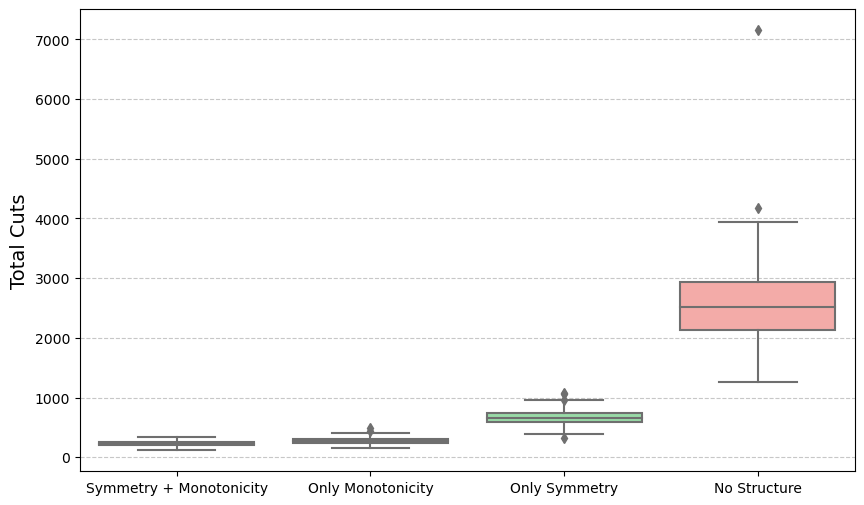

In [66]:
median_cuts_sorted = df.groupby('method')['total_cuts'].median().sort_values(ascending=False)

# Prepare data for Seaborn boxplot
df['method'] = pd.Categorical(df['method'], categories=median_cuts_sorted.index, ordered=True)
df_boxplot = df[['method', 'total_cuts']]

# Plot the boxplot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot, x='method', y='total_cuts', palette='pastel')
plt.ylabel('Total Cuts', fontsize=14)
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


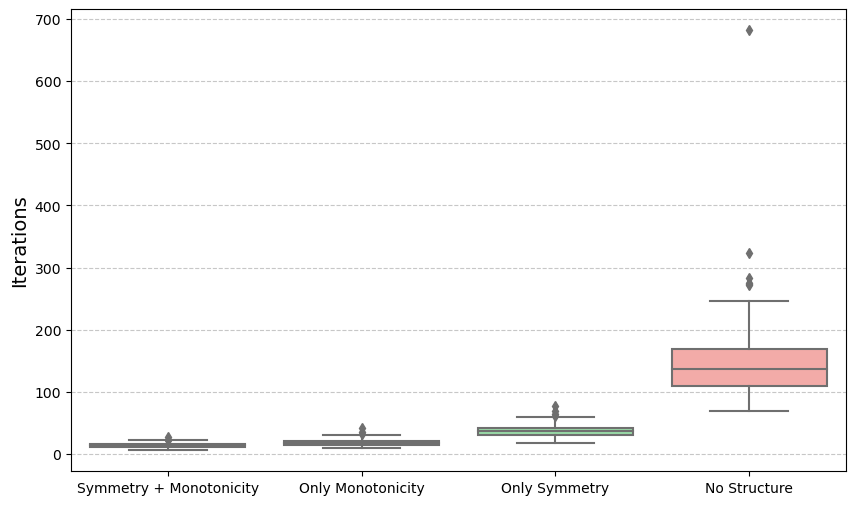

In [67]:
# Prepare data for Seaborn boxplot
df_boxplot_iterations = df[['method', 'iterations']]

# Plot the boxplot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot_iterations, x='method', y='iterations', palette='pastel')
plt.ylabel('Iterations', fontsize=14)
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [68]:
I = [(5, 10), (3,6), (3,6), (1,4), (1,4), (1,4), (1,4), (1,4), (1,4), (1,4)]
k = 2
p, v, info = solve_problem(I, k, verbose=True)

Pruned 0 intervals. Solving with n=10, k=2.
Using symmetry breaking. Number of decision vars: 3.
Added initial monotonicity constraints: 2 from 1 chains.
Iteration 0: Added 2 constraints, total cuts: 2, v_LB= 1.5000.
Iteration 1: Added 0 constraints, total cuts: 2, v_UB= 1.0000.


In [69]:
p

array([1. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ])